In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import AgglomerativeClustering  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/cars_clus.csv')

In [3]:
data1 = pd.read_csv('/content/cars_clus.csv')

In [4]:
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [5]:
print("Size of dataset before cleaning : ", data.shape)

Size of dataset before cleaning :  (159, 16)


In [6]:
# we can see that in some numeric features we have non-numeric values
# convert all the argument values into numeric values
data[['sales','resale','type','price','engine_s','horsepow',
      'wheelbas','width','length','curb_wgt',
      'fuel_cap','mpg','lnsales','partition']] = data[['sales','resale','type','price','engine_s','horsepow',
                                                       'wheelbas','width','length','curb_wgt',
                                                       'fuel_cap','mpg','lnsales','partition']].apply(pd.to_numeric, errors = 'coerce')
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,CL,14.114,18.225,0.0,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647,0.0
3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0


In [7]:
data.isnull().any()

manufact      True
model        False
sales         True
resale        True
type          True
price         True
engine_s      True
horsepow      True
wheelbas      True
width         True
length        True
curb_wgt      True
fuel_cap      True
mpg           True
lnsales       True
partition    False
dtype: bool

In [8]:
# since we cannot handle all the null values
# so we will drop the rows with null values
data = data.dropna()
data = data.reset_index(drop=True)
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [9]:
print("Size of dataset after cleaning : ", data.shape)

Size of dataset after cleaning :  (117, 16)


In [10]:
data['type'].unique

<bound method Series.unique of 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
112    0.0
113    0.0
114    0.0
115    0.0
116    0.0
Name: type, Length: 117, dtype: float64>

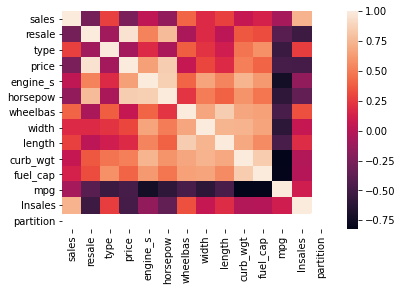

In [11]:
sns.heatmap(data.corr())

### Feature Engineering

In [12]:
# here we can see that columns type and partition have only value 0
# so we can drop them
data = data.drop(['type','partition'], axis=1)

### Normalization

In [13]:
# normalize the data. 
# MinMaxScaler transforms features by scaling each feature to a given range. 
# It is by default (0, 1)
from sklearn.preprocessing import MinMaxScaler
x = data.iloc[:,2:]
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)
x_norm

array([[0.0311018 , 0.17951595, 0.16717781, ..., 0.13364055, 0.43333333,
        0.59235294],
       [0.07266894, 0.2358551 , 0.26122811, ..., 0.31797235, 0.33333333,
        0.69176471],
       [0.0156869 , 0.39373297, 0.4466026 , ..., 0.35483871, 0.23333333,
        0.51258824],
       ...,
       [0.09435083, 0.18536624, 0.16308867, ..., 0.28110599, 0.4       ,
        0.72247059],
       [0.01750205, 0.18296201, 0.14659579, ..., 0.15668203, 0.36666667,
        0.52541176],
       [0.01015078, 0.1378426 , 0.1126559 , ..., 0.19815668, 0.36666667,
        0.46223529]])

In [14]:
from sklearn.cluster import AgglomerativeClustering  
from scipy.spatial import distance_matrix

In [15]:
dist_matrix = distance_matrix(x_norm,x_norm) 

In [16]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(x_norm)
agglom.labels_

array([1, 0, 0, 1, 0, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1,
       4, 5, 1, 0, 1, 0, 1, 5, 1, 2, 3, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1,
       1, 0, 5, 0, 1, 1, 1, 0, 0, 0, 0, 5, 0, 2, 2, 1, 1, 0, 0, 0, 5, 0,
       0, 0, 1, 5, 0, 1, 1, 0, 0, 0, 5, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1])

In [17]:
data['cluster_'] = agglom.labels_
data.head()

,manufact,model,sales,resale,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,cluster_
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,1
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,1
4,Audi,A6,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

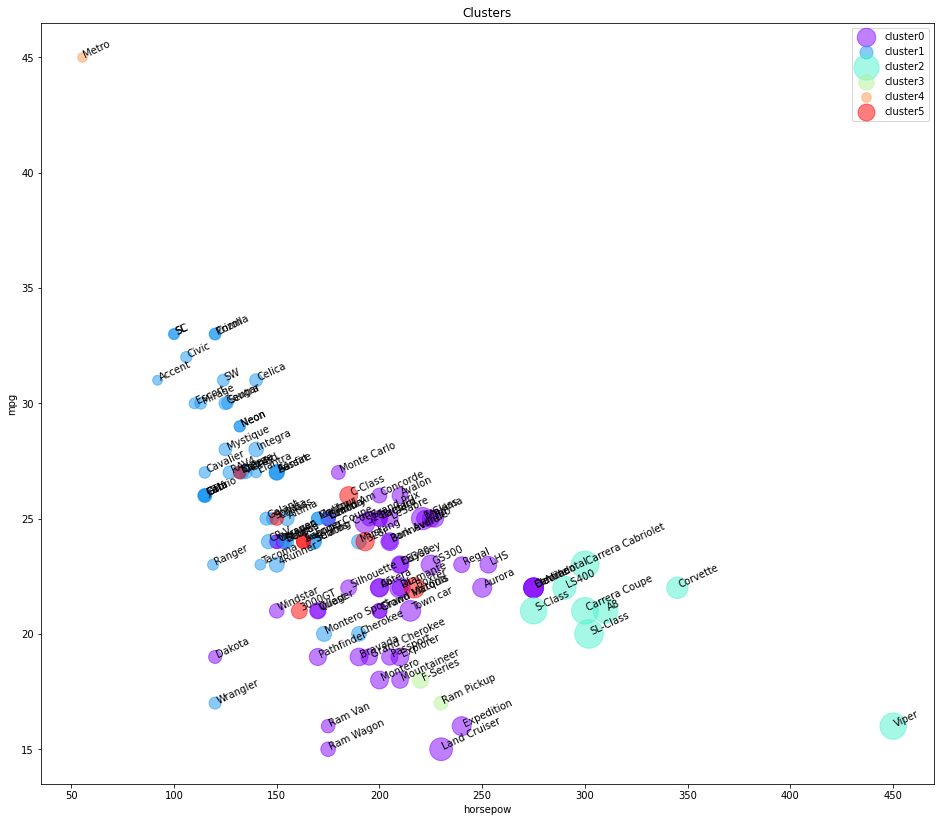

In [18]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')